In [ ]:
# import python libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import random

In [ ]:
# import csv file
df = pd.read_csv('Diwali Sales Data.csv', encoding= 'unicode_escape')
df

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,18-25,19,1,Maharashtra,Western,Chemical,Office,4,370.0,NaN,NaN
11247,1004089,Reichenbach,P00171342,M,26-35,33,0,Haryana,Northern,Healthcare,Veterinary,3,367.0,NaN,NaN
11248,1001209,Oshin,P00201342,F,36-45,40,0,Madhya Pradesh,Central,Textile,Office,4,213.0,NaN,NaN
11249,1004023,Noonan,P00059442,M,36-45,37,0,Karnataka,Southern,Agriculture,Office,3,206.0,NaN,NaN


# Exploratory Data Analysis

In [ ]:
def generate_random_colors(num_colors):
    colors = []
    for _ in range(num_colors):
        color = "#{:06x}".format(random.randint(0, 0xFFFFFF))
        colors.append(color)
    return colors

random_colors = generate_random_colors(len(sales_state))

### Gender

<ipython-input-86-202e3d9124cd>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x = 'Gender',data = df, palette=random_colors)


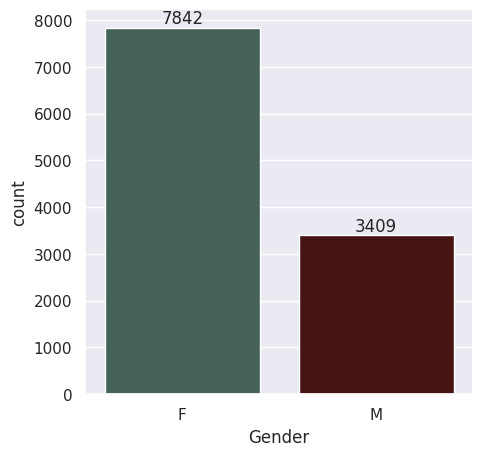

In [ ]:
# plotting a bar chart for Gender and it's count

ax = sns.countplot(x = 'Gender',data = df, palette=random_colors)
sns.set(rc={'figure.figsize':(5,5)})
for bars in ax.containers:
    ax.bar_label(bars)

<ipython-input-88-5e269d12c1f1>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Gender', y='Amount', data=sales_gen, palette=random_colors)


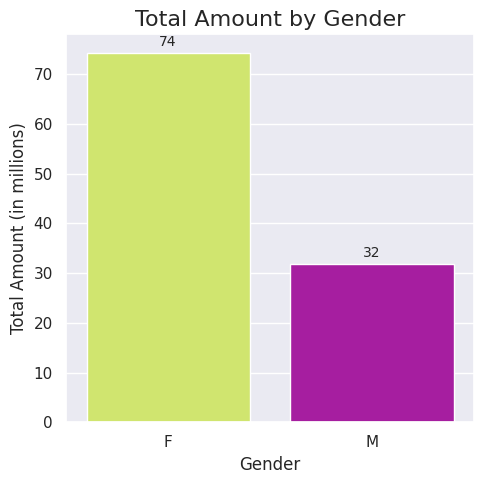

In [ ]:
# Calculate the total amount per gender
sales_gen = df.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
sales_gen['Amount'] = sales_gen['Amount'] / 1_000_000
# Generate a list of random colors
def generate_random_colors(num_colors):
    colors = []
    for _ in range(num_colors):
        color = "#{:06x}".format(random.randint(0, 0xFFFFFF))
        colors.append(color)
    return colors

random_colors = generate_random_colors(len(sales_gen))

# Plotting the bar chart with seaborn
sns.set(rc={'figure.figsize': (5, 5)})
ax = sns.barplot(x='Gender', y='Amount', data=sales_gen, palette=random_colors)

# Add value labels on the bars
for bar in ax.patches:
    ax.annotate(format(bar.get_height(), '.0f'),
                (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                ha='center', va='center',
                size=10, xytext=(0, 8),
                textcoords='offset points')

# Customize the aesthetics
ax.set_xlabel('Gender', fontsize=12)
ax.set_ylabel('Total Amount (in millions)', fontsize=12)
ax.set_title('Total Amount by Gender', fontsize=16)

plt.tight_layout()
plt.show()

*From above graphs we can see that most of the buyers are females and even the purchasing power of females are greater than men*

### Age

<ipython-input-51-45e41c0d0074>:1: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  ax = sns.countplot(data = df, x = 'Age Group', hue = 'Gender',palette=random_colors)


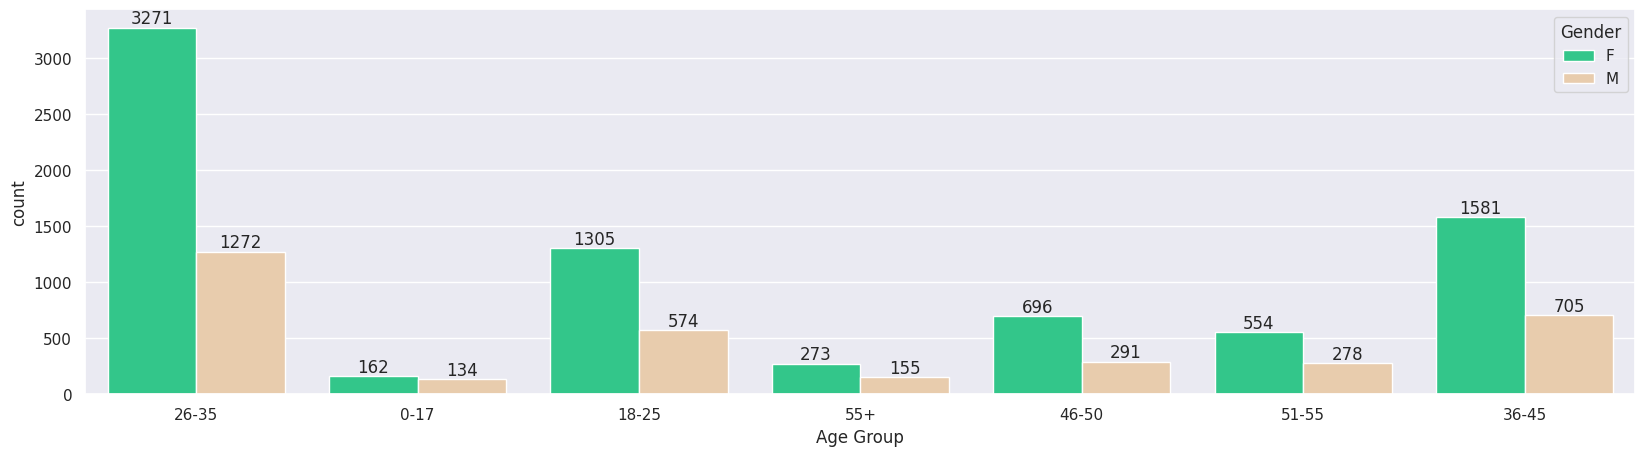

In [ ]:
ax = sns.countplot(data = df, x = 'Age Group', hue = 'Gender',palette=random_colors)

for bars in ax.containers:
    ax.bar_label(bars)

<ipython-input-52-7479f7e5097d>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'Age Group',y= 'Amount' ,data = sales_age,palette=random_colors)
<ipython-input-52-7479f7e5097d>:4: UserWarning: The palette list has more values (10) than needed (7), which may not be intended.
  sns.barplot(x = 'Age Group',y= 'Amount' ,data = sales_age,palette=random_colors)


<Axes: xlabel='Age Group', ylabel='Amount'>

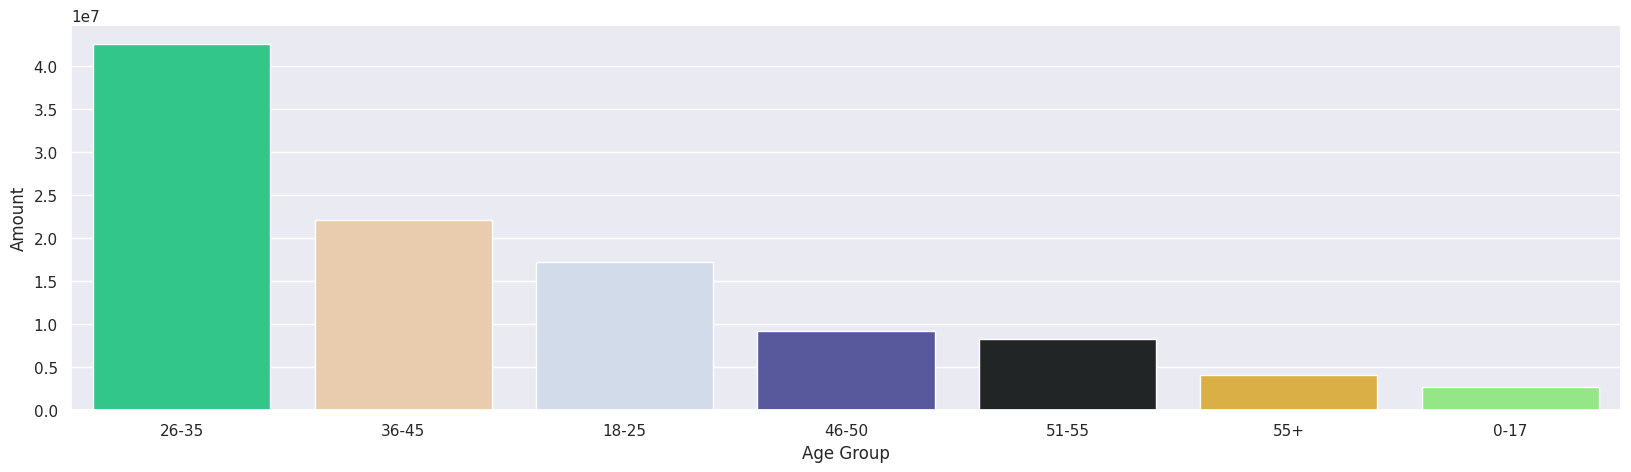

In [ ]:
# Total Amount vs Age Group
sales_age = df.groupby(['Age Group'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.barplot(x = 'Age Group',y= 'Amount' ,data = sales_age,palette=random_colors)

*From above graphs we can see that most of the buyers are of age group between 26-35 yrs female*

### State

<ipython-input-53-d17dbaddc37a>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = sales_state, x = 'State',y= 'Orders',palette=random_colors)


<Axes: xlabel='State', ylabel='Orders'>

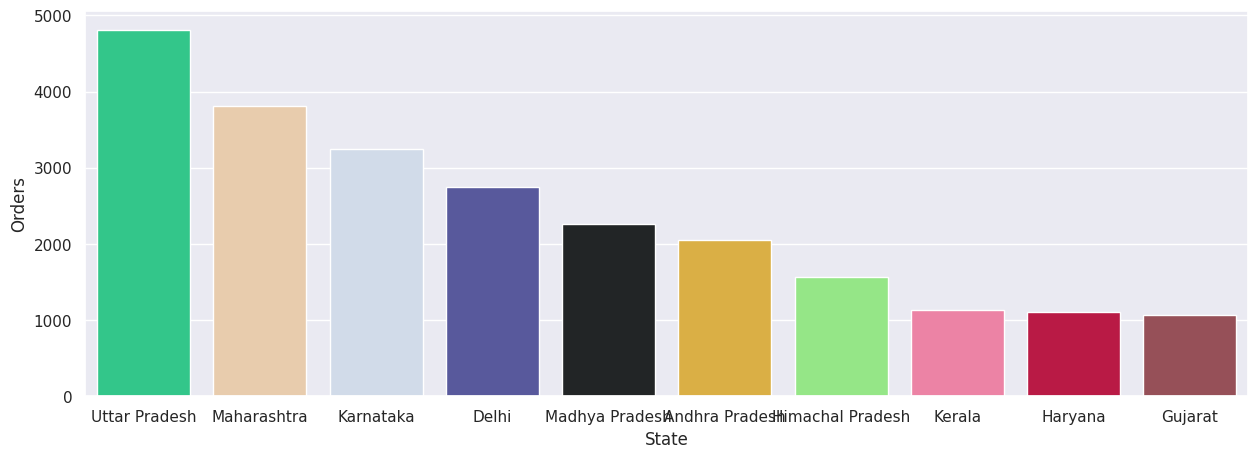

In [ ]:
# total number of orders from top 10 states

sales_state = df.groupby(['State'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)

sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(data = sales_state, x = 'State',y= 'Orders',palette=random_colors)

<ipython-input-54-7da2c5e1dc04>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = sales_state, x = 'State',y= 'Amount',palette=random_colors)


<Axes: xlabel='State', ylabel='Amount'>

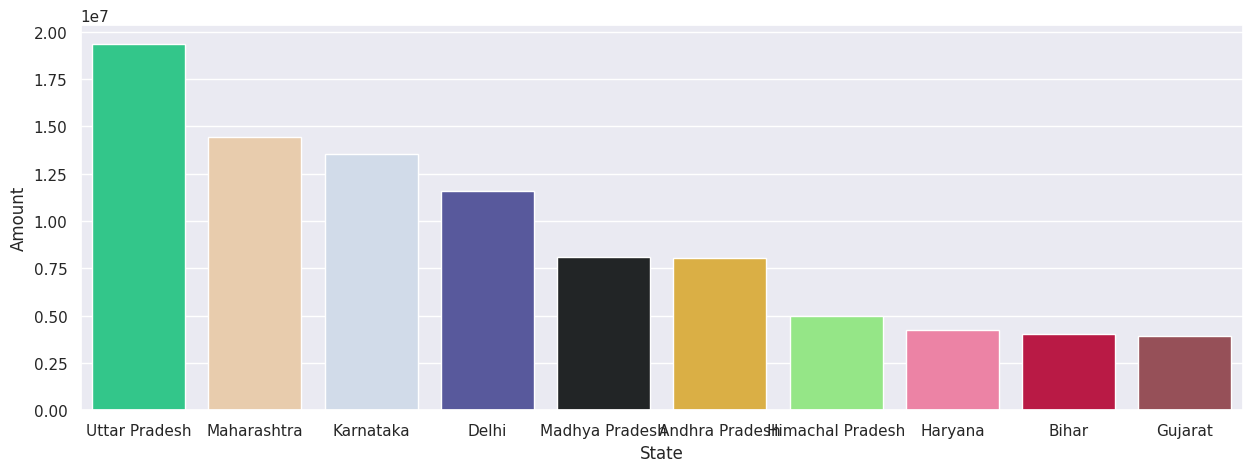

In [ ]:
# total amount/sales from top 10 states

sales_state = df.groupby(['State'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)

sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(data = sales_state, x = 'State',y= 'Amount',palette=random_colors)

*From above graphs we can see that most of the orders & total sales/amount are from Uttar Pradesh, Maharashtra and Karnataka respectively*


### Marital Status

<ipython-input-75-4a1b1eeedc7a>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data = df, x = 'Marital_Status',palette=['#2ca02c', '#d62728'])


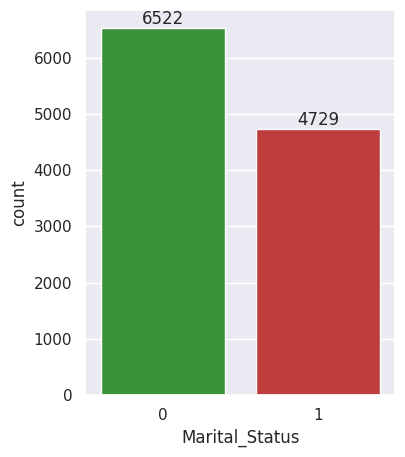

In [ ]:
ax = sns.countplot(data = df, x = 'Marital_Status',palette=['#2ca02c', '#d62728'])

sns.set(rc={'figure.figsize':(5,5)})
for bars in ax.containers:
    ax.bar_label(bars)

<ipython-input-63-b1a3c1b056d8>:4: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.barplot(data = sales_state, x = 'Marital_Status',y= 'Amount', hue='Gender',palette=random_colors)


<Axes: xlabel='Marital_Status', ylabel='Amount'>

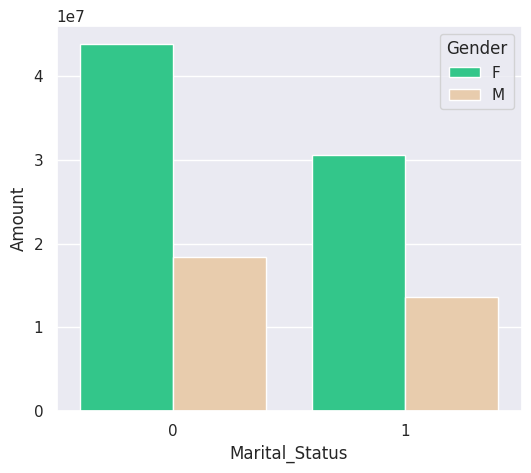

In [ ]:
sales_state = df.groupby(['Marital_Status', 'Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.set(rc={'figure.figsize':(6,5)})
sns.barplot(data = sales_state, x = 'Marital_Status',y= 'Amount', hue='Gender',palette=random_colors)

*From above graphs we can see that most of the buyers are married (women) and they have high purchasing power*

### Occupation

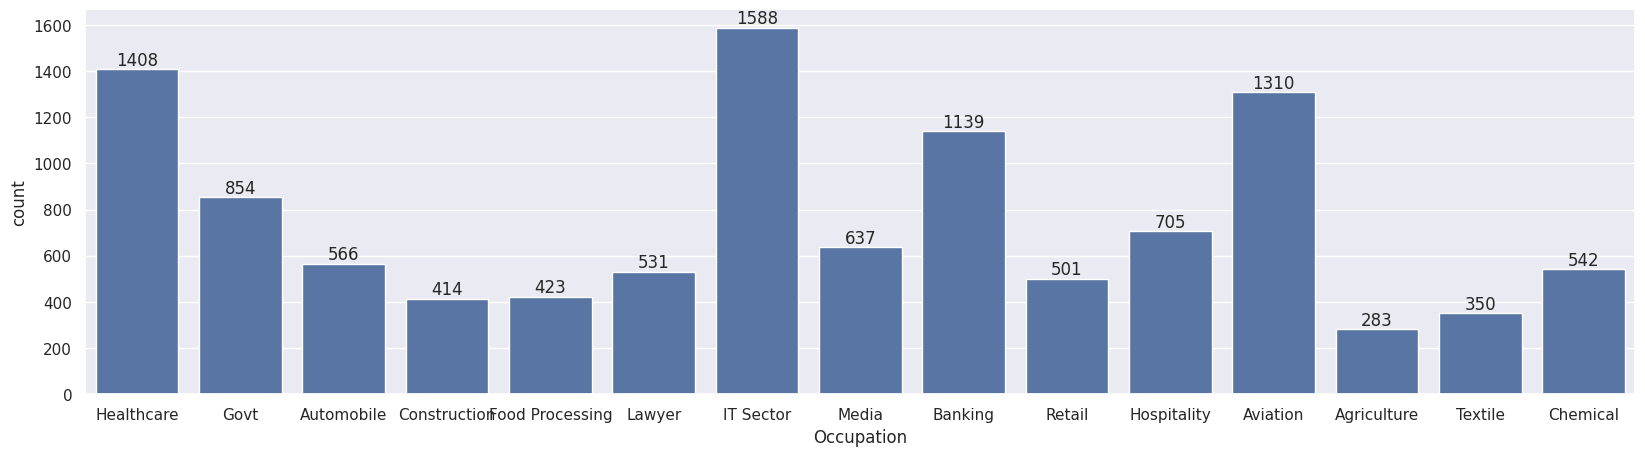

In [ ]:
sns.set(rc={'figure.figsize':(20,5)})
ax = sns.countplot(data = df, x = 'Occupation')

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Occupation', ylabel='Amount'>

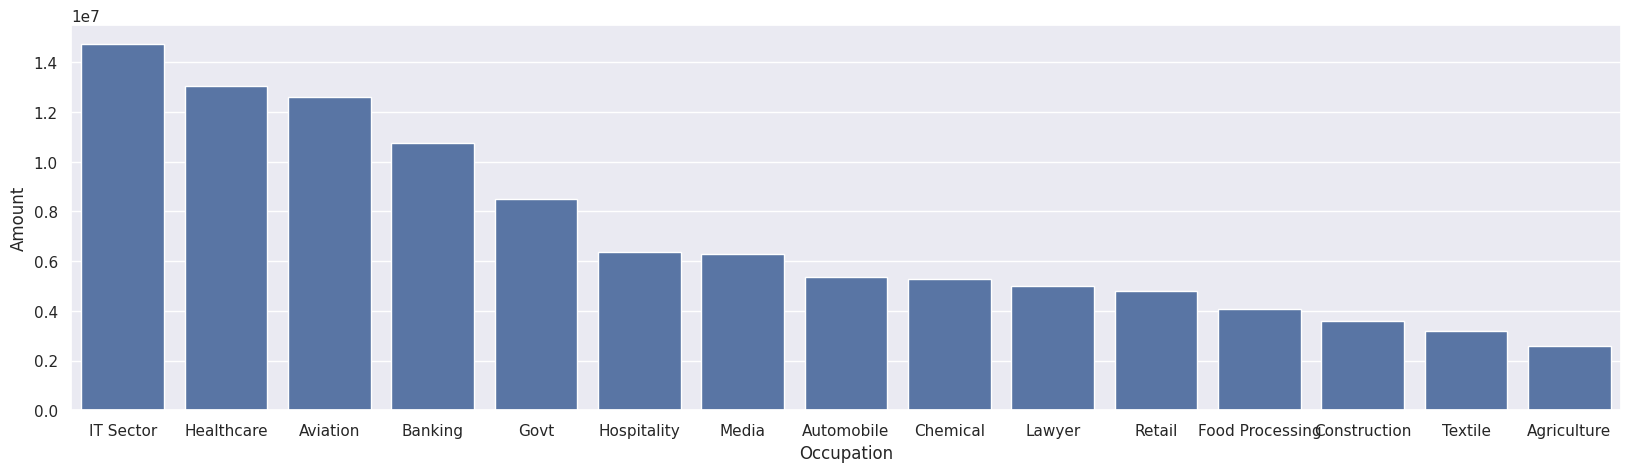

In [ ]:
sales_state = df.groupby(['Occupation'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_state, x = 'Occupation',y= 'Amount')

*From above graphs we can see that most of the buyers are working in IT, Healthcare and Aviation sector*

### Product Category

<ipython-input-62-29b4cda6d009>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data = df, x = 'Product_Category',palette=random_colors)
<ipython-input-62-29b4cda6d009>:2: UserWarning: 
The palette list has fewer values (10) than needed (18) and will cycle, which may produce an uninterpretable plot.
  ax = sns.countplot(data = df, x = 'Product_Category',palette=random_colors)


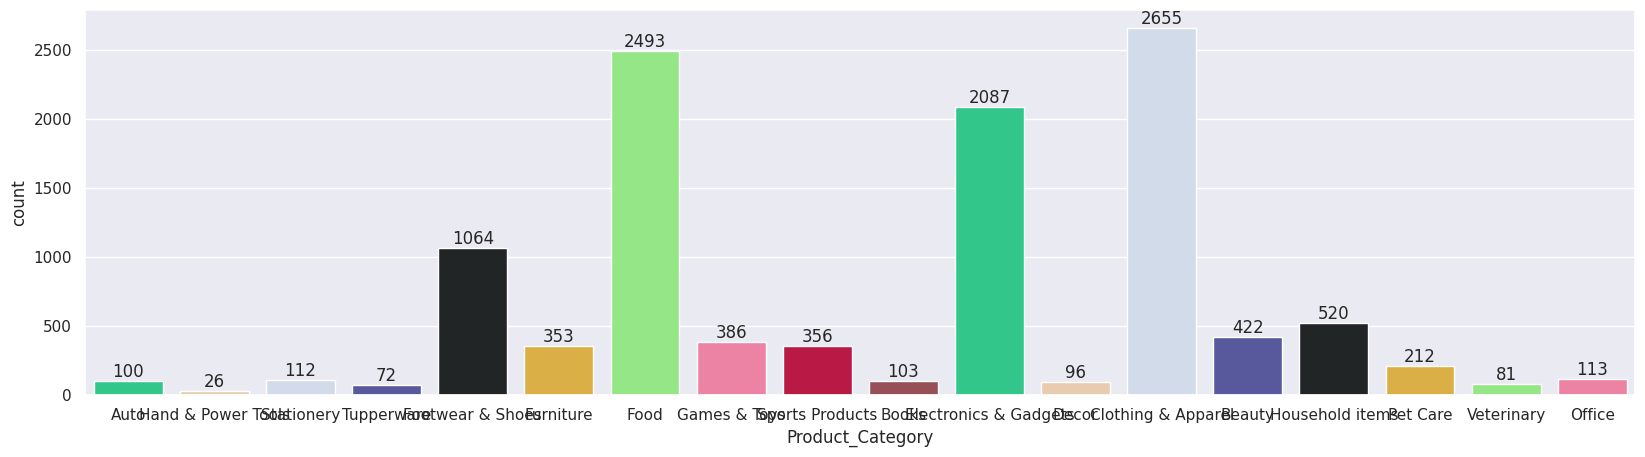

In [ ]:
sns.set(rc={'figure.figsize':(20,5)})
ax = sns.countplot(data = df, x = 'Product_Category',palette=random_colors)

for bars in ax.containers:
    ax.bar_label(bars)

<ipython-input-64-394504a9a303>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(data=sales_state, x='Product_Category', y='Amount', palette=random_colors)


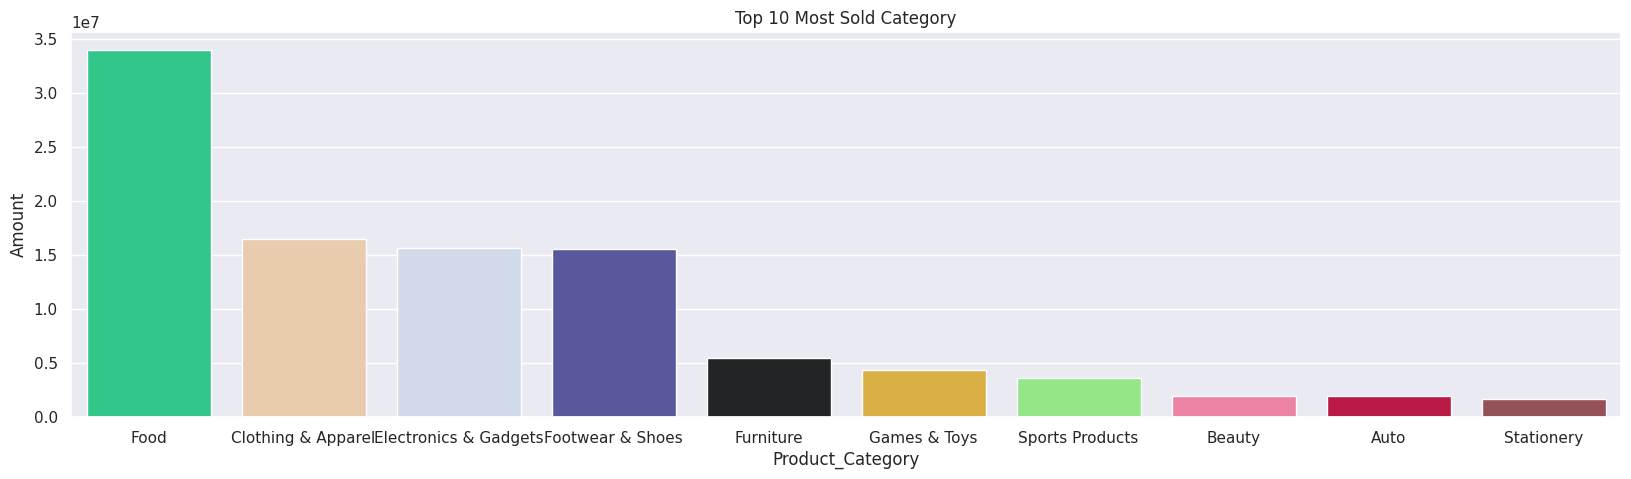

In [ ]:
sales_state = df.groupby(['Product_Category'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)


# Plotting the bar chart with seaborn and different colored bars
sns.set(rc={'figure.figsize': (20, 5)})
bar_plot = sns.barplot(data=sales_state, x='Product_Category', y='Amount', palette=random_colors)
bar_plot.set_title('Top 10 Most Sold Category')
plt.show()


*From above graphs we can see that most of the sold products are from Food, Clothing and Electronics category*

<ipython-input-65-fd2c3be6d1f3>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(data=sales_state, x='Product_Category', y='Orders', palette=random_colors)


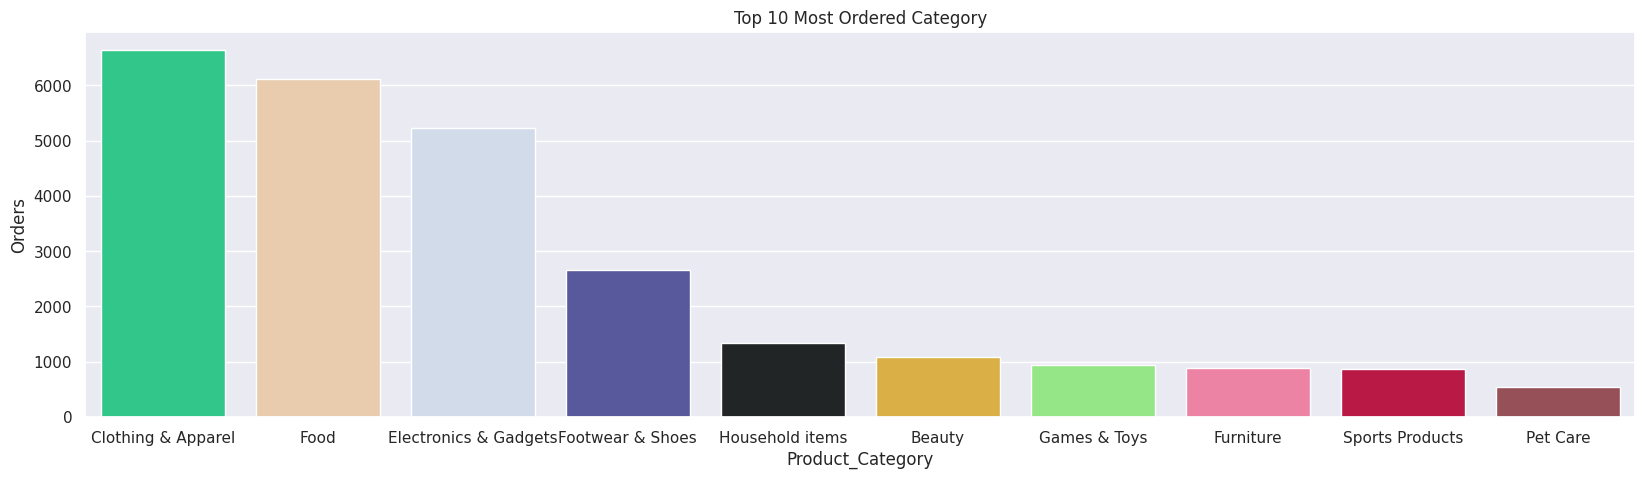

In [ ]:
# Calculate the top 10
sales_state = df.groupby(['Product_Category'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)



# Plotting the bar chart with seaborn and different colored bars
sns.set(rc={'figure.figsize': (20, 5)})
bar_plot = sns.barplot(data=sales_state, x='Product_Category', y='Orders', palette=random_colors)
bar_plot.set_title('Top 10 Most Ordered Category')
plt.show()

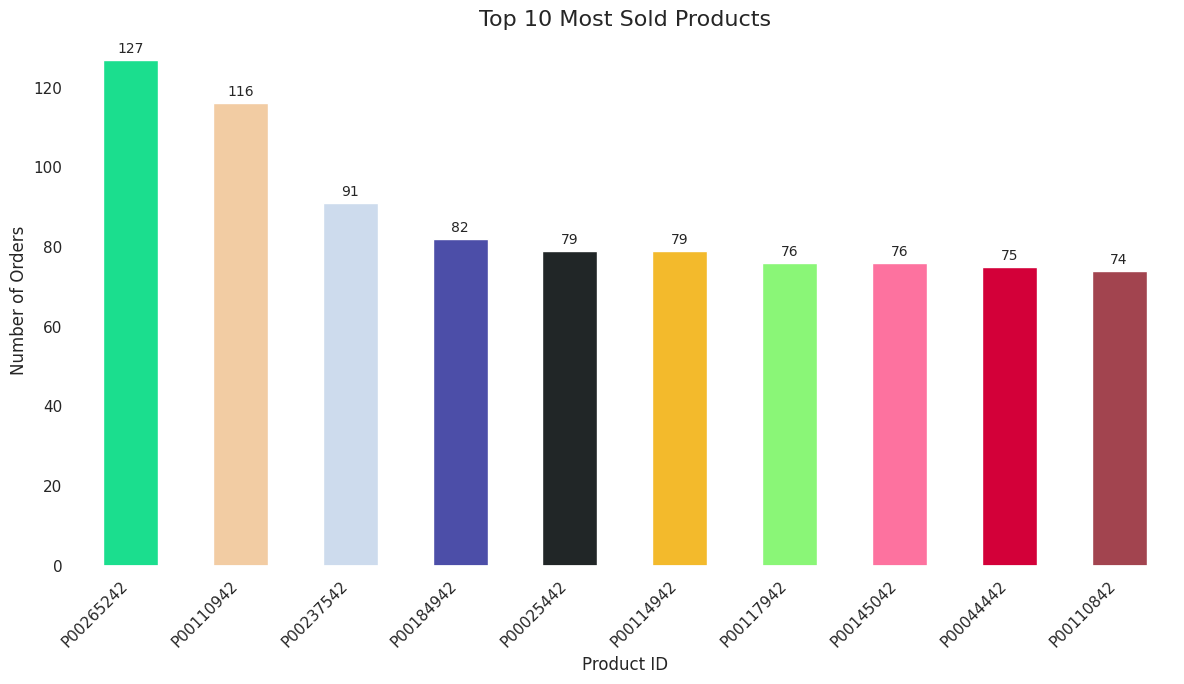

In [ ]:

# Calculate the top 10 most sold products
top_10_products = df.groupby('Product_ID')['Orders'].sum().nlargest(10).sort_values(ascending=False)

fig1, ax1 = plt.subplots(figsize=(12, 7))
bars = top_10_products.plot(kind='bar', color=random_colors, ax=ax1)
fig1.patch.set_facecolor('none')
ax1.patch.set_facecolor('none')
# Customize the aesthetics
ax1.set_xlabel('Product ID', fontsize=12)
ax1.set_ylabel('Number of Orders', fontsize=12)
ax1.set_title('Top 10 Most Sold Products', fontsize=16)

# Add value labels on the bars
for bar in bars.patches:
    ax1.annotate(format(bar.get_height(), '.0f'),
                 (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                 ha='center', va='center',
                 size=10, xytext=(0, 8),
                 textcoords='offset points')
# Remove background gridlines
ax1.grid(False)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Customer Retention Analysis

Repeated Customer


In [ ]:
# Group by User_ID and count the number of orders
repeated_customers = df.groupby('User_ID').size().reset_index(name='Order_Count')

# Filter customers who have more than one order
repeated_customers = repeated_customers[repeated_customers['Order_Count'] > 1]

# Display the repeated customers
repeated_customers

,User_ID,Order_Count
2,1000003,2
3,1000004,2
4,1000005,2
5,1000007,2
6,1000008,3
...,...,...
3750,1006035,5
3751,1006036,19
3752,1006037,2
3753,1006039,3


Customer Lifetime Value (CLV)

In [ ]:
# Calculate the total sales per customer
total_sales_per_customer = df.groupby('User_ID')['Amount'].sum().reset_index(name='Total_Sales')

# Calculate the total number of orders per customer
total_orders_per_customer = df.groupby('User_ID').size().reset_index(name='Total_Orders')

# Merge the total sales and total orders dataframes
customer_data = pd.merge(total_sales_per_customer, total_orders_per_customer, on='User_ID')

# Calculate the Average Order Value (AOV)
customer_data['Average_Order_Value'] = customer_data['Total_Sales'] / customer_data['Total_Orders']

# Calculate Purchase Frequency
total_customers = df['User_ID'].nunique()
total_orders = df['Orders'].sum()
purchase_frequency = total_orders / total_customers

# Assume an average customer lifespan (e.g., 1 year)
average_customer_lifespan = 1  # You can adjust this based on your business model

# Calculate CLV
customer_data['CLV'] = customer_data['Average_Order_Value'] * purchase_frequency * average_customer_lifespan

# Display the customer data with CLV
import ace_tools as tools; tools.display_dataframe_to_user(name="Customer Data with CLV", dataframe=customer_data)

# Display the table
customer_data

# Sales & Order Analysis


In [ ]:
# Average order Value

In [ ]:
total_sales_per_customer = df.groupby('User_ID')['Amount'].sum().reset_index(name='Total_Sales')

# Calculate the total number of orders per customer
total_orders_per_customer = df.groupby('User_ID').size().reset_index(name='Total_Orders')

# Merge the total sales and total orders dataframes
customer_data = pd.merge(total_sales_per_customer, total_orders_per_customer, on='User_ID')

# Calculate the Average Order Value (AOV)
customer_data['Average_Order_Value'] = customer_data['Total_Sales'] / customer_data['Total_Orders']
customer_data

,User_ID,Total_Sales,Total_Orders,Average_Order_Value
0,1000001,3977.0,1,3977.000000
1,1000002,7098.0,1,7098.000000
2,1000003,23714.0,2,11857.000000
3,1000004,30381.0,2,15190.500000
4,1000005,27667.0,2,13833.500000
...,...,...,...,...
3750,1006035,28235.0,5,5647.000000
3751,1006036,158407.0,19,8337.210526
3752,1006037,22649.0,2,11324.500000
3753,1006039,15061.0,3,5020.333333


## Conclusion:

###

*Married women age group 26-35 yrs from UP,  Maharastra and Karnataka working in IT, Healthcare and Aviation are more likely to buy products from Food, Clothing and Electronics category*

Thank you!